In [1]:
import os

In [14]:
data_dir=r'C:\Users\sandy\PYTHON\cell_images'

In [15]:
os.listdir(data_dir)

['test', 'train']

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from matplotlib.image import imread

In [28]:
#define path
test_path=data_dir+'\\test'
train_path=data_dir+'\\train'

In [26]:
test_path

'C:\\Users\\sandy\\PYTHON\\cell_images\\test'

In [29]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [70]:
parasite_data_test= test_path+"\\parasitized"
uninfected_data_test=test_path+"\\uninfected"

In [72]:
parasite_data_train= train_path+"\\parasitized"
uninfected_data_train=train_path+"\\uninfected"

In [73]:
parasite_data_train

'C:\\Users\\sandy\\PYTHON\\cell_images\\train\\parasitized'

In [74]:
os.listdir(uninfected_data)[5]

'C100P61ThinF_IMG_20150918_150041_cell_4.png'

In [80]:
## display one image
para_cell=parasite_data_train+'\\'+os.listdir(parasite_data_train)[5]

In [81]:
para_cell

'C:\\Users\\sandy\\PYTHON\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_167.png'

In [82]:
image=imread(para_cell)

In [83]:
image.shape

(145, 169, 3)

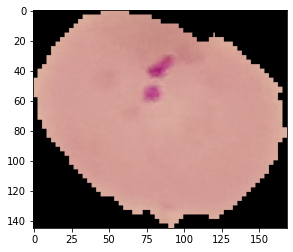

In [84]:
plt.imshow(image)

In [85]:
def para_img(x):
    
    para_cell=parasite_data_train+'\\'+os.listdir(parasite_data_train)[x]
    image=imread(para_cell)
    image=image.reshape()
    
    print(image.shape)
    
    return plt.imshow(image)
    

In [88]:
def uninfected_img(x):
    
    uninfected_cell=uninfected_data_train+'\\'+os.listdir(uninfected_data_train)[x]
    image=imread(uninfected_cell)
    
    print(image.shape)
    
    return plt.imshow(image)
    

(130, 157, 3)


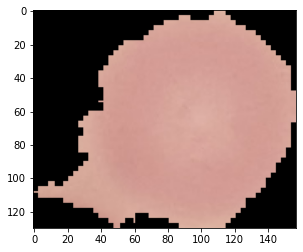

In [91]:
uninfected_img(5)

(145, 169, 3)


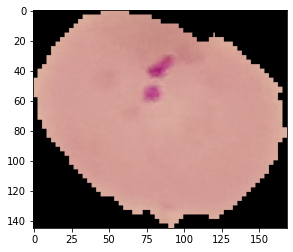

In [90]:
para_img(5)

In [92]:
## to get more data we use random image generator which generate according to the given data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [93]:
img_gen=ImageDataGenerator(rotation_range=20,
                           width_shift_range=.1,
                           height_shift_range=0.1,
                           shear_range=0.1,
                           zoom_range=0.1,
                           horizontal_flip=True,
                           fill_mode='nearest'
                           )

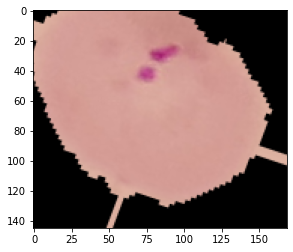

In [103]:
plt.imshow(img_gen.random_transform(image))

In [105]:
#Generating many manipulated images from a directory by using .flow_from_directory

img_gen.flow_from_directory(test_path)
img_gen.flow_from_directory(train_path)

Found 2600 images belonging to 2 classes.
Found 24958 images belonging to 2 classes.


In [108]:
image_shape = (130,130,3)

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [110]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)      

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

In [113]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)

In [115]:
# training image generate
batch_size=16

In [117]:
train_image_gen = img_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [119]:
test_image_gen = img_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [121]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [122]:
model.fit(train_image_gen,epochs=20,callbacks=early_stopping,validation_data=test_image_gen)

Epoch 1/20
1560/1560 [==============================] - 569s 364ms/step - loss: 0.8487 - accuracy: 0.5506 - val_loss: 0.6779 - val_accuracy: 0.5827
Epoch 2/20
1560/1560 [==============================] - 390s 250ms/step - loss: 0.6820 - accuracy: 0.5784 - val_loss: 0.6849 - val_accuracy: 0.5619
Epoch 3/20
1560/1560 [==============================] - 392s 251ms/step - loss: 0.6808 - accuracy: 0.5768 - val_loss: 0.6693 - val_accuracy: 0.5954
Epoch 4/20
1560/1560 [==============================] - 388s 249ms/step - loss: 0.6741 - accuracy: 0.5930 - val_loss: 0.6777 - val_accuracy: 0.5842
Epoch 5/20
1560/1560 [==============================] - 387s 248ms/step - loss: 0.6680 - accuracy: 0.6028 - val_loss: 0.6693 - val_accuracy: 0.5908
Epoch 6/20
1560/1560 [==============================] - 385s 247ms/step - loss: 0.4288 - accuracy: 0.8092 - val_loss: 0.3007 - val_accuracy: 0.9019
Epoch 7/20
1560/1560 [==============================] - 4105s 3s/step - loss: 0.2178 - accuracy: 0.9355 - val_lo

In [123]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

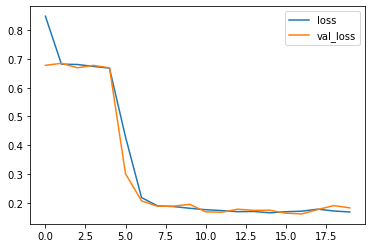

In [126]:
loss[['loss','val_loss']].plot()

In [128]:
model.evaluate(test_image_gen)

163/163 [==============================] - 44s 268ms/step - loss: 0.1763 - accuracy: 0.9469


[0.17630448937416077, 0.9469230771064758]

In [159]:
from tensorflow.keras.preprocessing import image ## it is generally used to show image(i.e no need to convert pnf into array)

In [130]:
#prediction
pred=model.predict_generator(test_image_gen)

C:\Users\sandy\AppData\Local\Temp/ipykernel_13080/85625157.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_image_gen)


In [133]:
predictions= pred>0.5 #threashole

In [141]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [140]:
from sklearn.metrics import confusion_matrix, classification_report

In [137]:
confusion_matrix(predictions,test_image_gen.classes)

array([[1185,   35],
       [ 115, 1265]], dtype=int64)

In [142]:
classification_report(predictions,test_image_gen.classes)

'              precision    recall  f1-score   support\n\n       False       0.91      0.97      0.94      1220\n        True       0.97      0.92      0.94      1380\n\n    accuracy                           0.94      2600\n   macro avg       0.94      0.94      0.94      2600\nweighted avg       0.94      0.94      0.94      2600\n'

(97, 124, 3)


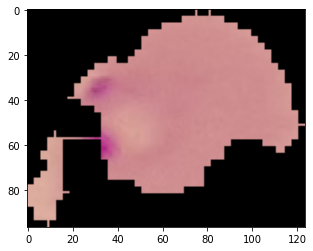

In [151]:
para_img(25)

In [145]:
para_cell

'C:\\Users\\sandy\\PYTHON\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_167.png'

In [160]:
img=image.load_img(para_cell, target_size=(130,130))

In [161]:
#model.summary()

In [166]:
img_arry=image.img_to_array(img)

In [171]:
img_arry.shape # we want to get (1,130,130,3) as model expect batches of images

(130, 130, 3)

In [175]:
image_array=np.expand_dims(img_arry,axis=0)

In [176]:
image_array.shape

(1, 130, 130, 3)

In [180]:
np.round(model.predict(image_array))

array([[0.]], dtype=float32)

In [182]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}